In [1]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.linalg import toeplitz
import matplotlib.gridspec as gridspec
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<h3> Discretization </h3>

<p> If we think back to high school algebra, you might remember the concept of a function. Recall that a function $y = f(x)$ is a relationship between an independent variable $x$ and a dependent variable $y$. Often times when you plotted functions in high school, you used a graphing calculator and plugged in the function, for example $y=x^{2}$, and miraculously a plot of a parabola appeared on your screen! In our case we want to go back even further and think about when we plotted functions by hand. Often times you would create a table of values (shown below), plot the points, and then connect them to graph the function. The more points you had the smoother the plot would become. </p>

    
<div id="header" style="height:75%;width:75%;">
    <div style='float:left'>
        <img src="Ch1S1F2.png" style="margin-left:15%;margin-top:-5%"/>
    </div>
    <div style='float:left'>
        <table border="2" style="margin-left:50%;margin-top:15%;"> 
            <tr>
                <th >input</th>
                <th>output</th> 
              </tr>
              <tr>
                <td>-2</td>
                <td>4</td> 
              </tr>
               <tr>
                <td>-1</td>
                <td>1</td> 
              </tr>
               <tr>
                <td>0</td>
                <td>0</td> 
              </tr>
               <tr>
                <td>1</td>
                <td>1</td> 
              </tr>
               <tr>
                <td>2</td>
                <td>4</td> 
              </tr>
        </table>
    </div>
</div>



<p>
When you were plotting functions by hand you were discritizing the system.  But before we get there let's review discritization. There a two quantities that define a discretized system: 
<ol>
<li>the number of points used </li>
<li> the space between the points </li>
</ol>
Let us define the number of points as $N$ and the the grid spacing as $dx$. The grid, also sometimes called the mesh, is defined as the set of values of the dependent variable, which can be represented as the vector $\vec{x} = (x_{1}, x_{2}...x_{i}...x_{N})$. We then operate a function $f$ on our grid to get the dependent variable $\vec{y} = (y_{1}, y_{2}...y_{i}...y_{N})$, which then allows us to plot the function. 

</p>

<p> Using the widget below, investigate what happens to the function $y = x^{2}$ when you alter the number of points used. </p>

In [9]:
def f(N):
    
    x_min = -5
    x_max = 5
    dx = (x_max-x_min)/(N)
    x = np.linspace(x_min, x_max, N)
    y = x**2
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x,np.zeros(len(x)), color = 'red', label = 'Grid')
    ax.plot(x, y, marker = 'o', linestyle = '-', color = 'blue', alpha = 0.8, label = 'Discretized Functon')
    ax.plot(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000)**2, color = 'k', alpha =0.5, label = 'Exact Function')
    ax.set_xlim([-6, 6])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc = 0)
    ax.legend(bbox_to_anchor=(1.75, 1))
    plt.show()
    
    return 
interact(f, N = (2, 20))
plt.show()

NameError: name 'interact' is not defined

<h2> Thinking Like a Computer Scientist </h2>

<p> When programming we have to take a problem we want to solve, break the problem down into smaller parts, and then translate those parts in a way that the computer understands. Let's use the example of plotting a curve by hand in order to better understand the problem. We know that the end result, i.e the solution of the problem, is a graph of the parabola. Let's look at the process we used to plot the parabola. First we defined two <b>variables</b>, one for the input and one for the output. Second we specified a set of points we wanted to evaluate the given function at, which computationally we define as the <b>grid points</b>. Now let's think about this step a little more deeply. 
<br / >
<br / >
We can either specify the number of grid points we want to use or we could have defined our grid based on the spacing between the points. We then performed an operation on each grid point $x_{i}$ in order to get the desired output value $y_{i}$. Lastly we plotted the points and connected the dots. Keep in mind how we broke this problem down, as this is the approach you should always use when approaching a problem computationally. </p>

<h3> Variables </h3>

The first step in any programming task is to define the variables needed for your problem, which could be your data or a set of outputs of a given function. It is imperative that you always define your variables as this is how the computer interprets the task you want to complete. Variables store information and are not limited to just numbers as we are used to from algebra. In scientific computing variables can represent a variety of different quantities but for our interest we will be mainly dealing with <b>integers</b> (whole numbers), <b>floats</b> (decimals), <b>strings</b> (words), and <b>arrays</b> (groupings of numbers/data/information). Right now we will not concern ourselves with the specific types of variables and their uses but rather will focus on how to define a variable, as shown below.


In [16]:
# Comments in Python are not read as commands and a preceded by #
# Comments make your code readable
# These are some examples of variables

# Always put the following at the start of your python program
# Numpy and Matplotlib are the required modules for linear algebra/numerical recipes and plotting

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Let's define some variables

x = 3
grid_points = np.arange(1, 17, 1)
banana = grid_points**2

<h3>Arrays and Storing Multiple Values</h3>

<p>
Before moving on to the next step of plotting our function by hand, let's exploit the power of the computer: to do repetitive takes quickly. When plotting the function by hand we would take a single point, perform the operation to get the desired output, and then repeat for each point we have. Fortunately for us, computers can automate this task rather simply so that we only need one command to deal with multiple points.  <p> 



<p>
Because we are dealing with a one dimensional problem the array will have shape ($N \times 1$) where $N$ is the number of grid points. Now we want to initialize this array in python. There are two ways to do this. First we can specify the minimum and maximum values of our grid and then the interval between each consecutive grid point. Alternatively we could specify the number of points we want between the end points, which is accomplished through the function <b>linspace</b>.

<br / >
<br / >
In order to generate arrays of numbers at a given interval in python we will use the function <b>arange(min, max, spacing)</b> from numpy. I assume that we are working in the same script and numpy and matplotlib.pyplot have already been imported. NOTE: The arange() function does not include the last value, so we want to add an extra dx to the end point.
</p>

In [27]:
# First let's define the minimum, maximum, and spacing for the parabola

x_min = -2
x_max = 2
dx = 0.1

# Create grid
# Note the function arange belongs to the package numpy so we have to tell python that
# This is done by putting np followed py a period (.) before the function

x_grid = np.arange(x_min, x_max+dx, dx)

In [26]:




# Now lets create a new grid using the linspace command

Npts = 25
z_min = -2
z_max = 2
z_grid = np.linspace(z_min, z_max, Npts)


<h3> Operations </h3>

Python can, of course, perform standard mathematical operations. If you are dealing with scalars (single numbers) then you do not have to worry about element by element or matrix operations. This section deals with operations involving arrays. When dealing with arrays we have to worry about how each element in the array is treated. Right now are NOT dealing with matrix multiplication. Let's say we had a vector of data given by 

\begin{equation}
\vec{x} = \begin{pmatrix} 
   1
\\ 2
\\ 3
\\ 4 
\\ 5
\end{pmatrix}
\end{equation}


Suppose we wanted to define a new vector $\vec{y}$ such that the values in $\vec{y}$ are the squared elements of $\vec{x}$ such that 

\begin{equation}
\vec{y} = \begin{pmatrix} 
   1
\\ 4
\\ 9
\\ 16 
\\ 25
\end{pmatrix}
\end{equation}


Python assumes element by element operations. Therefore we need to just square the array. Note: Exponentiation in python is given by two asterisks **

In [18]:
# Define the output variable y as the parabola y = x**2
 

y = x_grid**2

<h2>Simple Plotting </h2>

<p>
Now that we have our discretized system, we want to plot the solution! This section only covers the very basics of plotting (i.e not making pretty figures). A more advanced treatment of figures will be given in the next chapter. 

The plotting in python may at first appear to be  complicated, however, python's plotting routines are very powerful. The steps to create a python plot are as follows:

<ol>
    <li>Generate a figure </li>
    <li> Create an axis object for that figure </li>
    <li> Plot the data </li>
    <li> Specify figure parameters </li>
</ol>

The following commands will be used to generate the figure. Descriptions of the commands will be in unbolded brackets. 

<ol>
    <li> <b>fig = plt.figure()</b> [Creates figure object] </li>
    <li> <b>ax = fig.add_subplot(111)</b> [Create axes on figure] </li>
    <li> <b>ax.plot(vec1, vec2, 'color', label = 'LABEL')</b> [Generates a curve in which points are connected by solid lines with legend name given in the quotations] </li>
    <li> <b>ax.set_xlim([min, max])</b> [Generates the x-axis limits] </li>
    <li> <b>ax.set_ylim([min, max]</b> [Generates the y-axis limits] </li>
    <li> <b>ax.set_xlabel('LABEL')</b> [Generates x-axis label with name given inside the quotation marks] </li>
    <li> <b>ax.set_ylabel('LABEL')</b> [Generates y-axis label with name given inside the quotation marks] </li>
    <li> <b>ax.set_title('LABEL')</b> [Generates a title for the graph with name given inside the quotation marks] </li>
    <li> <b>ax.legend()</b> [Generates a legend for the plot] </li>
    <li> <b>plt.show() </b>[Displays figure] </li>
<ol>



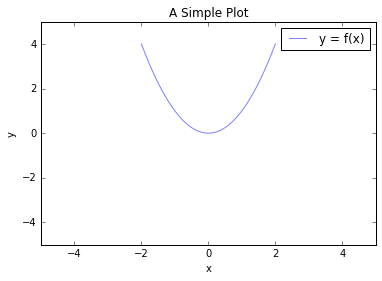

In [19]:
# This is a template for a simple plot in python

# Initialize figure and create axis object
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot data
ax.plot(x_grid, y, label = 'y = f(x)', color = 'blue', alpha = 0.5)

# Set figure attributes
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A Simple Plot')

ax.legend()
plt.show()